Basic Summary of the Dataset
Dataset Shape: (61088, 21)

Time Period: 1965-02-18 to 2021-06-03

Summary Statistics (Mean, Min, Max, Std):
                          mean          min           max           std
open             8.151494e+03   238.000000  3.333548e+04  6.142411e+03
high             8.200860e+03   238.399994  3.348408e+04  6.176036e+03
low              8.095748e+03   237.699997  3.289704e+04  6.102014e+03
close            8.150551e+03   238.100006  3.315412e+04  6.140058e+03
adj close        8.150317e+03   238.100006  3.315412e+04  6.140233e+03
volume           1.800476e+09   100.000000  2.326455e+10  4.205492e+09
closeusd         4.024979e+03    52.850000  1.893438e+04  4.178835e+03
price_diff      -9.430172e-01 -1381.850590  1.513590e+03  1.023672e+02
ma_5             8.146389e+03   238.580002  3.293297e+04  6.135852e+03
ma_10            8.141267e+03   240.080000  3.277967e+04  6.130977e+03
ma_30            8.121231e+03   243.423333  3.163145e+04  6.111978e+03
volatilit

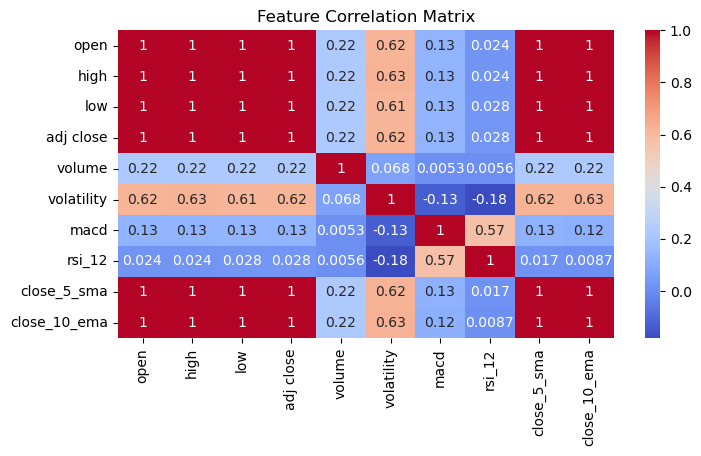

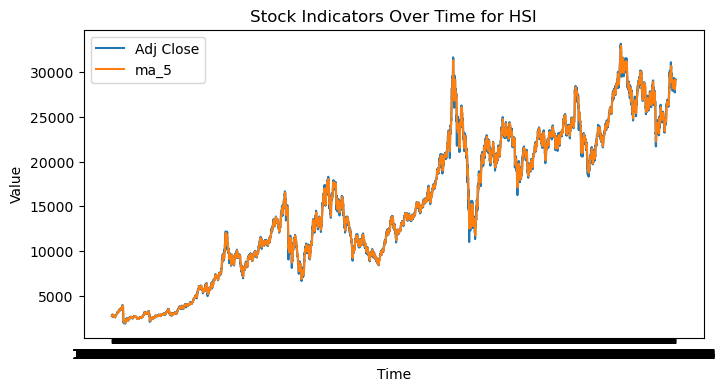

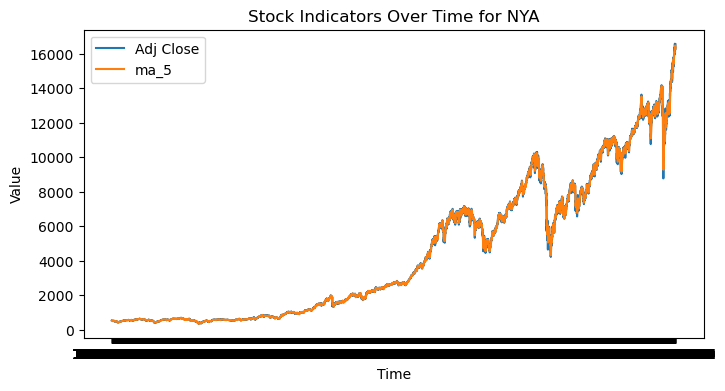

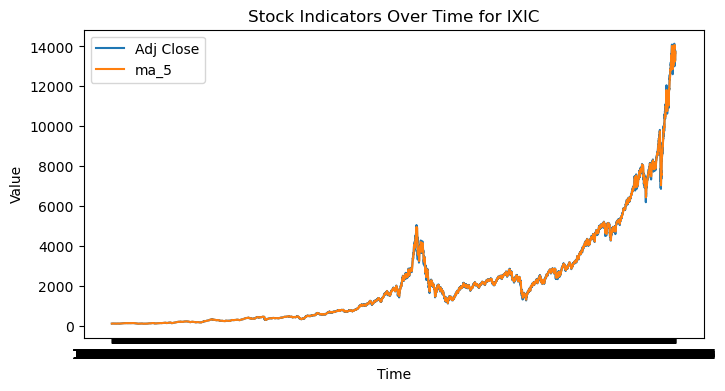

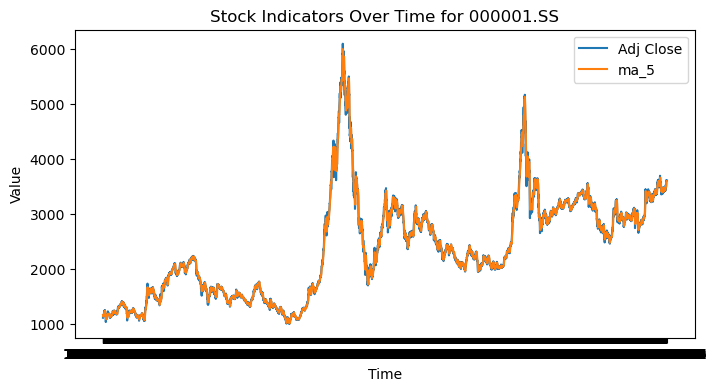

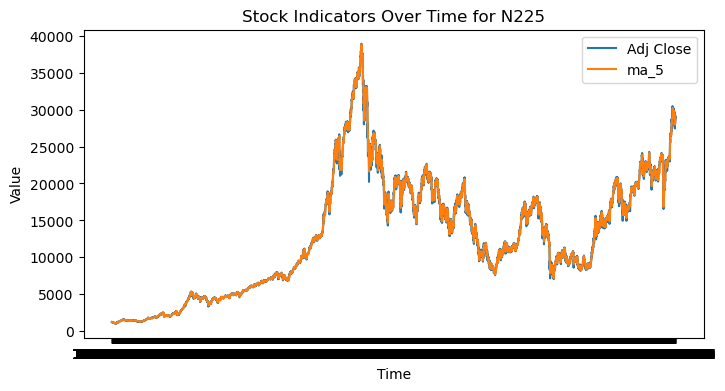

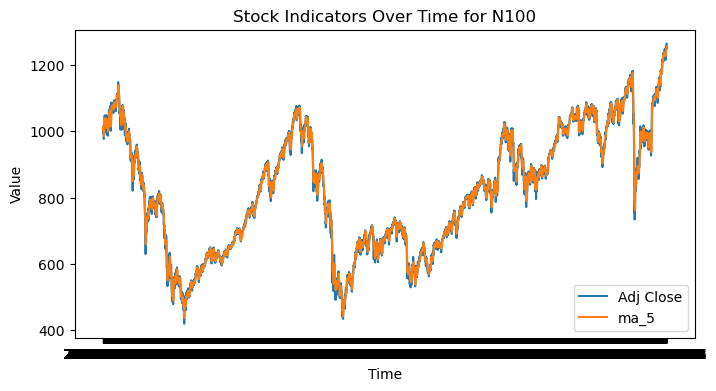

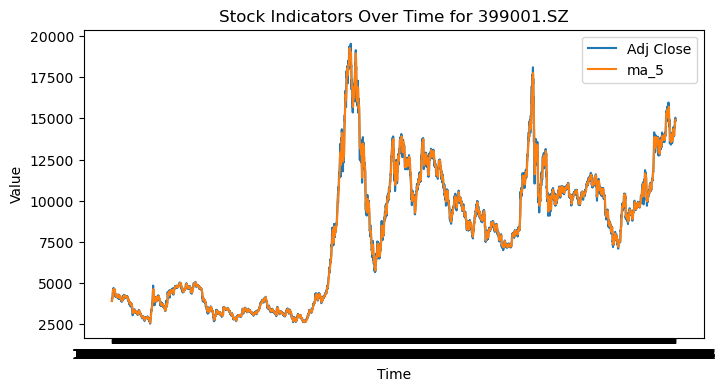

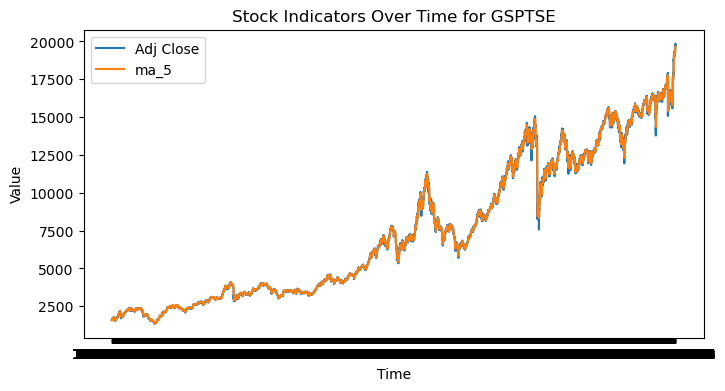

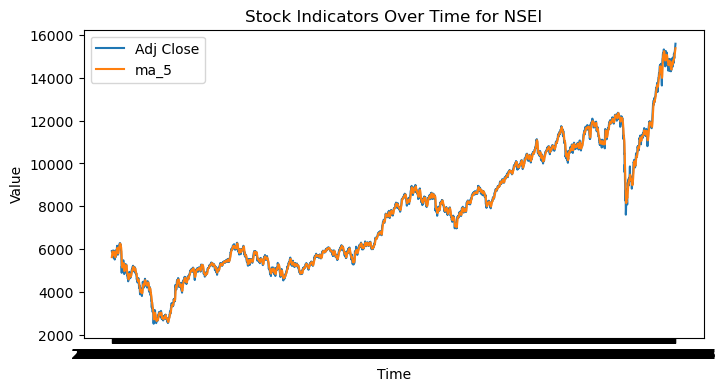

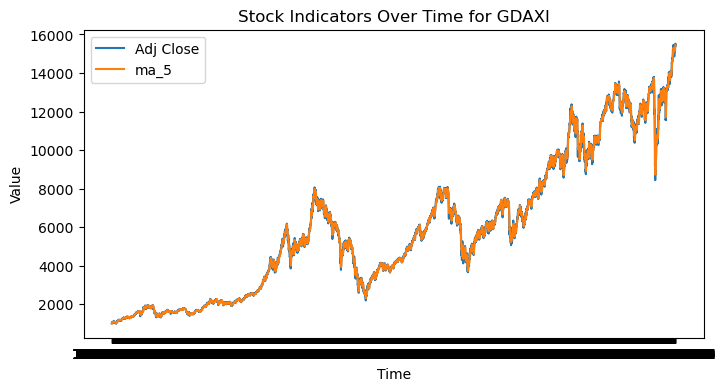

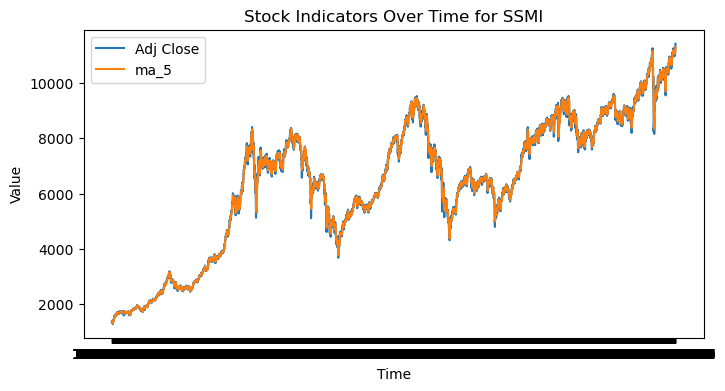

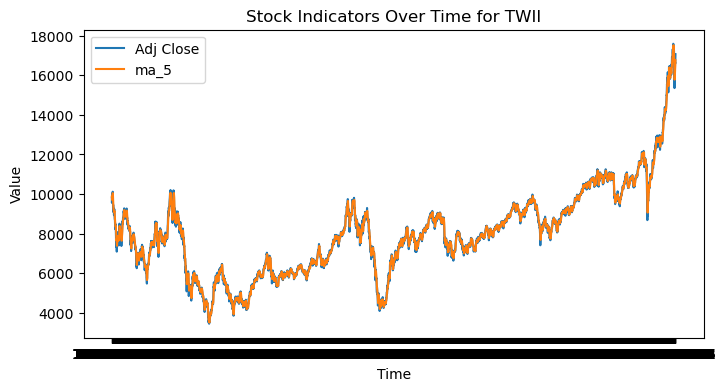

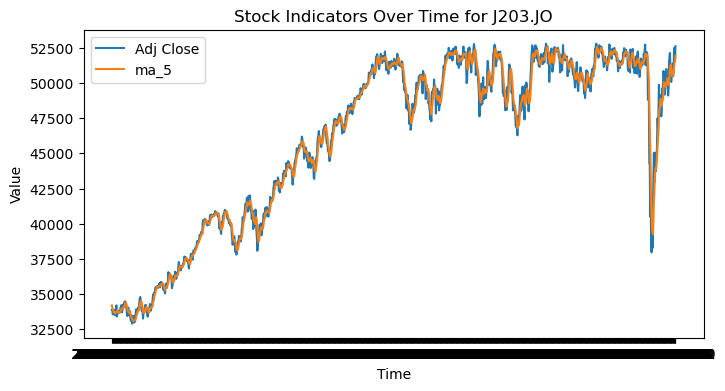

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Load the processed data
df_cleaned = pd.read_csv('../data/processed/indexData_processed.csv')
df_cleaned_before_calculation = pd.read_csv('../data/processed/indexData_processed_before_calculation.csv')



# Basic summary of the dataset
print("Basic Summary of the Dataset\n" + "="*40)
# Dataset shape (number of rows and columns)
print(f"Dataset Shape: {df_cleaned.shape}\n")
# Time period (start and end date)
print(f"Time Period: {df_cleaned_before_calculation['Date'].min()} to {df_cleaned_before_calculation['Date'].max()}\n")
# Summary statistics for numerical columns
summary_stats = df_cleaned.describe().T  
summary_stats = summary_stats[['mean', 'min', 'max', 'std']] 
print("Summary Statistics (Mean, Min, Max, Std):\n", summary_stats, "\n")


# Correlation heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df_cleaned[['open', 'high', 'low', 'adj close', 'volume', 'volatility', 'macd', 'rsi_12', 'close_5_sma', 'close_10_ema']].corr(), annot=True, cmap="coolwarm")
plt.title('Feature Correlation Matrix')
plt.show()


# Trend Analysis
indexes = df_cleaned_before_calculation['index_stock'].unique()
for index in indexes:
    # Filter data for the current index
    df_index = df_cleaned_before_calculation[df_cleaned_before_calculation['index_stock'] == index]  
    
    # Create a plot for each index
    plt.figure(figsize=(8, 4))
    plt.plot(df_index['Date'], df_index['Adj Close'], label='Adj Close')
    plt.plot(df_index['Date'], df_index['ma_5'], label='ma_5')
    plt.title(f'Stock Indicators Over Time for {index}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


